In [75]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [92]:
# This is How you load data from a csv file.
# CSV is basically Just a comma Separated File , That is why we are using it to load text, and Delimiter will result in different COlumns of the data Array.
data = np.loadtxt('./data/data_w3_ex1.csv',delimiter=',')

In [93]:
# Split the data into two separate arrays for features and targets.
x=data[:,0]
y=data[:,1]
print(x.shape,y.shape)

(50,) (50,)


In [94]:
# Convert them into 2D Array Because scikit lib requires 2d Arrays
x=np.expand_dims(x,axis=1) # this adds a dimention , pehlay (5) tha lets say abh (5,1) ho jai ga
y=np.expand_dims(y,axis=1)
print(f"shape of X :{x.shape} , and shape  of y : {y.shape}")


shape of X :(50, 1) , and shape  of y : (50, 1)


In [5]:
'''
Just checking the Function of np.expand_dims()
arr = np.array([[1,2],[3,4],[5,6]])
print(arr.shape)
arr = np.expand_dims(arr,axis = 1)
arr = np.expand_dims(arr,axis = 3)
print(arr.shape)
'''

'\nJust checking the Function of np.expand_dims()\narr = np.array([[1,2],[3,4],[5,6]])\nprint(arr.shape)\narr = np.expand_dims(arr,axis = 1)\narr = np.expand_dims(arr,axis = 3)\nprint(arr.shape)\n'

In [95]:
# Split the data into 3 sets
#x_train=x[:30]
#y_train=y[:30]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

In [96]:
# Checking the Size of the Training Examples
print(x_train.shape, x_train[29])

(30, 1) [3161.20408163]


In [97]:
# Scale the Features using Scikit 
scale_linear= StandardScaler()
 
x_train_scaled = scale_linear.fit_transform(x_train) # This is Used when Fitting the Data / For calculating Mean /std 
# But when you want to scale new features with same std and mean use scale_linear.fit(new_data_array)
print(f"Mean : {scale_linear.mean_.squeeze():.2f}")
print(f"Std : {scale_linear.scale_.squeeze():.2f}")

Mean : 2504.06
Std : 574.85


In [98]:
# lets manually compute the mean and std and normalize the data
meann= np.mean(x_train)
print(f"mean : {meann}")
# Mean same he aa rha hai donun mien 

mean : 2504.061224489796


In [88]:
# let me check the Array 
print(x_train)
#print(y_train)

[[1651.        ]
 [1691.81632653]
 [1732.63265306]
 [1773.44897959]
 [1814.26530612]
 [1855.08163265]
 [1895.89795918]
 [1936.71428571]
 [1977.53061224]
 [2018.34693878]
 [2059.16326531]
 [2099.97959184]
 [2140.79591837]
 [2181.6122449 ]
 [2222.42857143]
 [2263.24489796]
 [2304.06122449]
 [2344.87755102]
 [2385.69387755]
 [2426.51020408]
 [2467.32653061]
 [2508.14285714]
 [2548.95918367]
 [2589.7755102 ]
 [2630.59183673]
 [2671.40816327]
 [2712.2244898 ]
 [2753.04081633]
 [2793.85714286]
 [2834.67346939]]


In [99]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

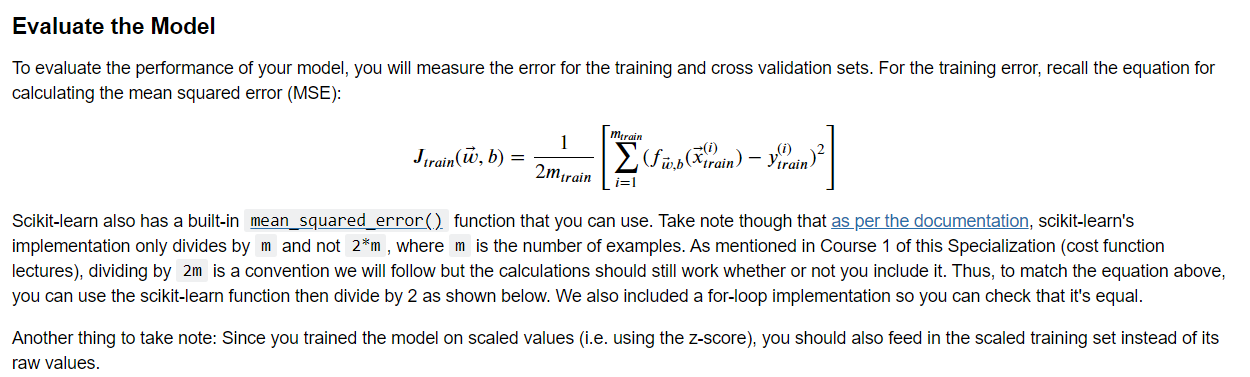

In [100]:
# Now to evaluate our model .
y_hat=linear_model.predict(x_train_scaled)

# abh yahan kia ho rha hai ke hamara Model train ho chuka hai parameters waghera bhi fit ho chukkay hain abh hum new parameters ke across , tamam training
# examples mein jo bhi error aa rha wo check krein gay. yHat predictions hai hamaray model se or y original Values hai x ke across

# Calculating Mean Squared error Using the Scikit Lib // but dividing by 2 to match both funcitons
print(f"Mean Squared Error : {mean_squared_error(y_train,y_hat)/2}")

# Now by our Own Implementation
total_squared_error = 0
for i in range(len(y_hat)) :
    squared_err_ith= (y_hat[i]-y_train[i])**2
    total_squared_error+=squared_err_ith

m = len(y_hat)
mse=total_squared_error/(2*m)
print(f"Mean Squared Error Using Our Own Implementation : {mse}")



Mean Squared Error : 186071.90442021325
Mean Squared Error Using Our Own Implementation : [186071.90442021]


In [102]:
# Create Cross Validation set
#x_cv=x[30:40]
#y_cv=y[30:40]
#print(x_cv.shape)

In [101]:
print(f"mean and std used : {scale_linear.mean_.squeeze():.2f} {scale_linear.scale_.squeeze():2f}")

mean and std used : 2504.06 574.853681


In [103]:
# Make Prediction on our Cross Validation set
x_cs_scaled=scale_linear.transform(x_cv)
y_hat=linear_model.predict(x_cs_scaled)

In [104]:
# Check the Error on the Cross Validation Set
print(f"MSE : {mean_squared_error(y_hat,y_cv)/2}")

MSE : 232639.11379419235


# Adding Polynomials to your data

In [105]:
# using Polynomial Features Class
poly = PolynomialFeatures(degree=2 , include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
print(x_train_mapped[:5])

[[3.32446939e+03 1.10520967e+07]
 [2.34487755e+03 5.49845073e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.63059184e+03 6.92001341e+06]
 [2.58977551e+03 6.70693719e+06]]


In [106]:
# NOw Again Scale the Data
# Can't Use the old One because it will have mean of only one feature , std of one feature

scalar_poly= StandardScaler()
x_train_mapped_scaled=scalar_poly.fit_transform(x_train_mapped)

#print(x_train_mapped_scaled[:5])

In [107]:
# Create the model and make predictions on the cross validation set
model = LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yHat = model.predict(x_train_mapped_scaled)
print(f"MSE On Trainin set : {mean_squared_error(yHat,y_train)/2}")

x_cv_mapped = poly.transform(x_cv)
x_cv_mapped_scaled =  scalar_poly.transform(x_cv_mapped)
yHat= model.predict(x_cv_mapped_scaled)
print(f"MSE On CVS : {mean_squared_error(yHat,y_cv)/2}")

MSE On Trainin set : 49.111609334025154
MSE On CVS : 87.6984121111191


## Choosing The Best Model 

In [113]:
# Initialize the LIst to Store Models ,errors ,etc
models = []
train_mses = []
cv_mses = []
polys = []
scalars = []

for i in range(1,11) : 

    poly = PolynomialFeatures(degree=i , include_bias=False)
    x_mapped = poly.fit_transform(x_train)
    polys.append(poly)

    scalar = StandardScaler()
    x_mapped_scaled = scalar.fit_transform(x_mapped)
    scalars.append(scalar)

    model = LinearRegression()
    model.fit(x_mapped_scaled,y_train)
    models.append(model)

    trainingYhat = model.predict(x_mapped_scaled)
    trainingErr = mean_squared_error(trainingYhat,y_train)/2
    train_mses.append(trainingErr)

    x_cv_mapped = poly.transform(x_cv)
    x_cv_mapped_scaled = scalar.transform(x_cv_mapped)
    cvYHat = model.predict(x_cv_mapped_scaled)
    cvErr = mean_squared_error(cvYHat,y_cv)/2
    cv_mses.append(cvErr)


In [116]:
# Now find the Index in the cv_mses , which has the lowest value becasue it contains the min err on the Cross validtaion set 
print(cv_mses)
deg = np.argmin(cv_mses) +1 # adding plus 1 because degree is form 1-10 and array is from 0-9
print(deg)

[551.7789026952216, 87.6984121111191, 81.15087907197037, 79.43134912070502, 79.58685943660193, 98.74226159416736, 99.32345423295469, 99.04845551897822, 109.58952852540058, 121.85067511978427]
4


In [122]:
# Now we need TO make Prediction on our Test set to check how good our model is at Generalizing new Values

x_test_mapped = polys[deg-1].transform(x_test)
x_test_mapped_scaled = scalars[deg-1].transform(x_test_mapped)
yHat = models[deg-1].predict(x_test_mapped_scaled)
print(f"Measn Square Error on Training set {train_mses[deg-1]}")
print(f"Measn Square Error on DEV SET {cv_mses[deg-1]}")
print(f"Mean Squared Error on Test data : {mean_squared_error(yHat,y_test)/2}")

Measn Square Error on Training set 47.146466442636395
Measn Square Error on DEV SET 79.43134912070502
Mean Squared Error on Test data : 104.6316820528975
